In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("sales_data.csv")

In [3]:
df.sample(5)

,ProductID,Category,Price,Quantity,Revenue
5560,5561,3,206.074098,12,2472.889174
8754,8755,3,273.478890,16,4375.662235
8565,8566,2,97.228639,16,1555.658223
257,258,2,118.949106,4,475.796424
7782,7783,2,44.511346,8,356.090765


In [4]:
df.columns

Index(['ProductID', 'Category', 'Price', 'Quantity', 'Revenue'], dtype='object')

In [5]:
df.shape

(10000, 5)

In [6]:
df.isnull().sum()

ProductID    0
Category     0
Price        0
Quantity     0
Revenue      0
dtype: int64

In [8]:
#Task 1
import numpy as np
file_path = "sales_data.csv"

# Load the CSV file into a NumPy array
data = np.genfromtxt(file_path, delimiter=',', skip_header=1)

# Print the loaded data
print(data)

[[1.00000000e+00 3.00000000e+00 4.54271968e+02 1.30000000e+01
  5.90553559e+03]
 [2.00000000e+00 4.00000000e+00 1.47296341e+02 1.60000000e+01
  2.35674146e+03]
 [3.00000000e+00 1.00000000e+00 4.34546327e+02 1.30000000e+01
  5.64910225e+03]
 ...
 [9.99800000e+03 2.00000000e+00 2.92231174e+01 6.00000000e+00
  1.75338704e+02]
 [9.99900000e+03 2.00000000e+00 1.42933087e+02 1.00000000e+00
  1.42933087e+02]
 [1.00000000e+04 1.00000000e+00 1.62985561e+02 9.00000000e+00
  1.46687005e+03]]


In [9]:
#Task 2
# Total number of products sold
total_products_sold = data.shape[0]

# Total revenue generated
total_revenue = np.sum(data[:, 4])  # Sum the Revenue column (index 4)

# Average price per product
average_price = np.mean(data[:, 2])  # Calculate the mean of the Price column (index 2)

# Most expensive product
most_expensive_product = data[np.argmax(data[:, 2]), 0]  # Find the index of the maximum Price and get the corresponding ProductID

# Print the statistics
print("Total number of products sold:", total_products_sold)
print("Total revenue generated:", total_revenue)
print("Average price per product:", average_price)
print("Most expensive product:", most_expensive_product)


Total number of products sold: 10000
Total revenue generated: 27397488.452185363
Average price per product: 270.17016511014594
Most expensive product: 1124.0


In [10]:
#Task 3
# Calculate the sales quantity for each category
categories, category_counts = np.unique(data[:, 1], return_counts=True)

# Find the index of the category with the highest sales quantity
top_selling_index = np.argmax(category_counts)

# Get the top-selling category
top_selling_category = categories[top_selling_index]

# Print the top-selling category
print("Top-selling product category:", top_selling_category)

Top-selling product category: 1.0


In [11]:
#Task 4
# Filter the dataset based on quantity
filtered_data = data[data[:, 3] >= 10]

# Save the filtered data as a new CSV file
np.savetxt('filtered_data.csv', filtered_data, delimiter=',', fmt='%.2f')

print("Filtered data has been saved as filtered_data.csv")

Filtered data has been saved as filtered_data.csv


In [12]:
#Task 5
# Filter the dataset based on quantity
filtered_data = data[data[:, 3] >= 10]

# Calculate the total revenue generated by the filtered dataset
total_revenue_filtered = np.sum(filtered_data[:, 4])  # Sum the Revenue column (index 4) of the filtered dataset

# Print the total revenue generated by the filtered dataset
print("Total revenue generated by the filtered dataset:", total_revenue_filtered)

Total revenue generated by the filtered dataset: 21155903.03655059


In [13]:
#Task 6
# Filter the dataset based on quantity
filtered_data = data[data[:, 3] >= 10]

# Calculate the average price per product for the filtered dataset
average_price_filtered = np.mean(filtered_data[:, 2])  # Calculate the mean of the Price column (index 2) of the filtered dataset

# Print the average price per product for the filtered dataset
print("Average price per product for the filtered dataset:", average_price_filtered)

Average price per product for the filtered dataset: 274.12207455268816


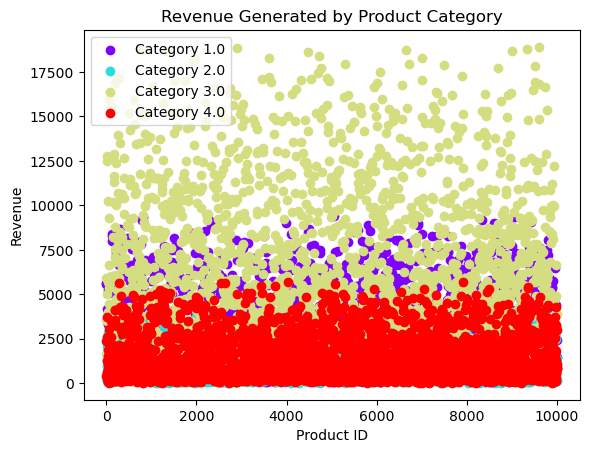

In [14]:
#Task 7
import matplotlib.pyplot as plt

# Calculate the revenue generated by each product category
categories, category_revenue = np.unique(data[:, 1], return_counts=True)

# Generate a list of colors for each category
num_categories = len(categories)
colors = plt.cm.rainbow(np.linspace(0, 1, num_categories))

# Plot the scatter plot
for i in range(num_categories):
    category_data = data[data[:, 1] == categories[i]]
    plt.scatter(category_data[:, 0], category_data[:, 4], color=colors[i], label=f"Category {categories[i]}")

# Set the labels and title for the plot
plt.xlabel("Product ID")
plt.ylabel("Revenue")
plt.title("Revenue Generated by Product Category")

# Add a legend to show the category colors
plt.legend()

# Show the plot
plt.show()